# Исследование и анализ рекламных источников для мобильной игры «Космические братья»

Мы аналитики команды игры "Космические братья", в ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.. Наша игра уже пользуется досточно большой популярностью и пора задуматься о монетизации. Чем мы и займемся.

**Цель исследования** - провести анализ рекламных источников и определить какой источник приводит наиболее потенциально "прибыльных" пользователей.

Реклама в нашем приложении будет показываться на экране выбора здании при постройке, исходя из этого нам надо определить: пользователи из каких источников в данной ситуации наиболее предпочтительней для нашей монетизации. Либо в процессе исследования найти более подходящий способ монетизации ( вдруг ПВП-режим окажется наиболее популярным у игроков, и рекламу  стоит показывать перед началом боя между игроками, ну или игроком и мобами ( не уточняется кто с кем будет биться).

Для достижения поставленной задачи нам необходимо будет решить следующие задачи:

1. Провести исследовательский анализ данных;
2. Проанализировать влияние источника перехода в игру на поведение пользователя;
3. Определить пользователей, которые строят больше всего зданий ( для монетизации самое главное);
4. Проверим статистические гипотезы
   * Проверим гипотезу: время завершения уровня различается в зависимости способа прохождения:
        - *через реализацию проекта,*
        - *через победу над первым игроком.*
   * Проверим гипотезу: тип победы не отличается между пользвателями, пришедшими с двух разных источников ( рассмотрим пользователей с двух самых популярных каналов) ( я правда пока смутно представляю как это будет реализовываться):
        - *Нулевая гипотеза(H0): тип победы у пользователй из источника 1 и из источника 2 одинаковый*
        - *Альтернативная гипотеза (Н1): тип победы у пользователй из источника 1 и из источника 2 разный*
   
   
И не забываем: **Космические братья — бесконечность беспредельна!**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
<a href='#1'>1. Загрузка и подготовка данных</a>

<a href='#1.1'>1.1 Загрузка данных</a>

<a href='#1.2'>1.2 Предобработка данных</a>
    
<a href='#1.3'>1.3 Выводы</a>

<a href='#2'>2. Исследовательский анализ данных</a>
    
<a href='#2.1'>2.1 Изучение и проверка данных</a>   
        
<a href='#2.1.1'>2.1.1 Изучение природы пропусков</a>   
        
<a href='#2.1.2'>2.1.2 Изучение пользователей по источнику перехода</a>   
            
<a href='#2.1.3'>2.1.3 Изучение пользователей по их действиям в приложении</a>    
 
<a href='#2.2'>2.2 Изучение поведения пользователей в зависмости от источника перехода</a>   

<a href='#2.3'>2.3 Выводы</a>
    
<a href='#3'>3. Проверка гипотез</a>
         
<a href='#3.1'>3.1 Проверка гипотезы: время завершения уровня различается в зависимости способа прохождения</a>
             
<a href='#3.2'>3.2 Проверка гипотезы: тип победы не отличается между пользвателями, пришедшими с двух разных источников</a>
     
<a href='#4'>4 Общий вывод</a> 
    
<a href='#5'>5 Дашборд по проекту</a> 
        
<a href='#6'>6 Презентация по проекту</a> 

<a id='1'></a>
## Загрузка и подготовка данных

<a id='1.1'></a>
### Загрузка данных

In [1]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
import plotly.express as px
from scipy import stats as st
import scipy.stats as stats

In [2]:
def info_data(data):
    print('\033[1m' + 'Информация, включающая записи датасета:' + '\033[0m')
    display (data.sample(10))
    print('\033[1m' + 'Информация о датасете:' + '\033[0m\n')
    data.info()
    print('\033[1m' + '\nДубликатов в таблице:' + '\033[0m', data.duplicated().sum())
    print('\033[1m' + '\nПодсчет пропусков:' + '\033[0m\n', data.isna().sum())

Загрузим предоставленные нам данные.

Основные данные у нас хранятся в датасете "game_actions.csv", который показывает нам активность пользователей в нашей мобильной игре:

In [3]:
data_actions=pd.read_csv('game_actions.csv')
info_data(data_actions)

Информация, включающая записи датасета:


,event_datetime,event,building_type,user_id,project_type
17397,2020-05-06 00:25:59,building,spaceport,ec598bb3-85cc-4a6e-9522-8dc92925a30e,NaN
105414,2020-05-14 11:18:48,building,research_center,965fd559-2041-4c36-9a3a-b08c502ee7cf,NaN
47287,2020-05-08 18:31:37,building,assembly_shop,b583b694-5b6c-44f7-b245-175663cf05d8,NaN
19001,2020-05-06 04:27:01,building,assembly_shop,c79e61e0-a462-4189-ad0b-240b831bdb6c,NaN
7811,2020-05-04 22:58:48,building,assembly_shop,f44f5682-781d-465e-aba0-a8431d1d2380,NaN
93743,2020-05-12 21:43:30,building,spaceport,8fbdae2a-9c6c-4d8c-857e-761bbfd17e01,NaN
133761,2020-05-23 15:18:20,finished_stage_1,NaN,503be0ce-57cc-4d5c-bd34-bf6328273f73,NaN
18498,2020-05-06 03:05:40,building,spaceport,9af9c900-4b7f-469a-909b-6363d37d5ada,NaN
104715,2020-05-14 08:50:49,building,spaceport,d2733a33-2b68-4bfe-8527-23630d8f69fb,NaN
132197,2020-05-21 21:12:20,finished_stage_1,NaN,1ebf63ef-e430-4165-a1a8-738d784c20f6,NaN


Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

Дубликатов в таблице: 1

Подсчет пропусков:
 event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64


- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Так же у нас есть еще два датасета, которые указывают нам на рекламные источники, из которых пришли пользователи к нам в игру и сколько стоило привлечение пользвоателей:

In [4]:
data_cost=pd.read_csv('ad_costs.csv')
info_data(data_cost)

Информация, включающая записи датасета:


,source,day,cost
11,instagram_new_adverts,2020-05-07,109.915254
7,instagram_new_adverts,2020-05-03,943.204717
3,facebook_ads,2020-05-06,177.982200
26,youtube_channel_reklama,2020-05-08,40.217907
0,facebook_ads,2020-05-03,935.882786
9,instagram_new_adverts,2020-05-05,313.970984
4,facebook_ads,2020-05-07,111.766796
1,facebook_ads,2020-05-04,548.354480
16,yandex_direct,2020-05-05,308.232990
27,youtube_channel_reklama,2020-05-09,23.314669


Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

Дубликатов в таблице: 0

Подсчет пропусков:
 source    0
day       0
cost      0
dtype: int64


- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

In [5]:
data_user=pd.read_csv('user_source.csv')
info_data(data_user)

Информация, включающая записи датасета:


,user_id,source
13074,f6a765d3-a1c4-487c-86ae-079586c2180d,yandex_direct
8562,a16233a6-1ae9-4074-95c7-a5caa8a0624d,youtube_channel_reklama
11431,d83a3558-5c84-4a76-b3b4-96f5a15a12e1,youtube_channel_reklama
8669,a36142ae-b6ed-49e7-8c09-f72c8776fd39,youtube_channel_reklama
8470,9fd8609c-d3a8-4724-8e33-cc6f7fe82813,yandex_direct
1605,1d083bfe-d54c-4ba6-b2f2-416ea16da4d8,facebook_ads
5219,60fb22c3-fcab-4d0f-b9a3-9a4c40470cc4,facebook_ads
1663,1df5e462-1a92-4368-9170-0953f7d9bc62,yandex_direct
10233,c1514957-a0d4-47e7-886a-e87fb3641fb7,youtube_channel_reklama
7290,884c7881-2c0f-484b-99ee-c960f3bf29e9,instagram_new_adverts


Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB

Дубликатов в таблице: 0

Подсчет пропусков:
 user_id    0
source     0
dtype: int64


- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

<a id='1.2'></a>
### Предобработка данных

Преобразуем значения по столбцу event_datetime в датасете data_actions к типу данных "дата":

In [6]:
data_actions['event_datetime'] = pd.to_datetime(data_actions['event_datetime'])

Аналогично сделаем со значениями по столбцу day в датасете data_cost:

In [7]:
data_cost['day'] = pd.to_datetime(data_cost['day'])

Выше мы увидели, что у нас есть 1 дубликат, что составляет менее процента от всех данных датасета data_actions. Считаю, что их можно удалить со спокойной совестью:

In [8]:
data_actions = data_actions.drop_duplicates().reset_index(drop=True)
print('\033[1m' + '\nДубликатов в таблице после удаления:' + '\033[0m', data_actions.duplicated().sum())


Дубликатов в таблице после удаления: 0


<a id='1.3'></a>
### Выводы

Бегло посмотрев на данные и проведя некоторые преобразования, можно сказать следующее:
1. Наименования столбцов имеют правильное наименование - это хорошо.
2. Привели данные по датам к нужному типу.
3. Мы увидели пропуски в data_actions - предлагаю пока с этим ничего не делать, так как могу предположить, что по факту это не пропуски:
    * отсутсвующие значения по столбцу "project_type" - это не пропуски как такоевые, а просто не наступдление определенного события ( то есть когда игрок построил здание - это обычное событие и оно не должно отображаться в данном столбце, а вот когда пользователь завершил так называемое "исследование", то в этом столбце появляется запись об этом)
    * отсутсвующие значения по столбцу "building_type" - это тоже не пропуски в чистом виде. Отсутсвие значения здесь показывает нам, что игрок завершил первый этап игры и здание он при этом не строил, значит и отображть здесь нечего.
4. Удалили 1 дубликат.    
В целом можно сказать, предоставленные нам данных отличные. С ними можно работать, не тратив много времени на рпедобработку и "чистку".

<a id='2'></a>
## Исследовательский анализ данных

<a id='2.1'></a>
### Изучение и проверка данных

<a id='2.1.1'></a>
#### Изучение природы пропусков

Предлагаю вначале точно убедиться, что у нас нет в data_actions пропусков.

Для этого изучим столбцы "event", "building_type" и "project_type":

In [9]:
print('\033[1m' + 'Всего событий "building_type"  :' + '\033[0m', len(data_actions['building_type'].unique()))
print('\033[1m' + 'Уникальные события событий "event"  :' + '\033[0m', data_actions['building_type'].unique())

Всего событий "building_type"  : 4
Уникальные события событий "event"  : ['assembly_shop' 'spaceport' nan 'research_center']


In [10]:
print('\033[1m' + 'Всего событий "project_type"  :' + '\033[0m', len(data_actions['project_type'].unique()))
print('\033[1m' + 'Уникальные события событий "event"  :' + '\033[0m', data_actions['project_type'].unique())
print('\033[1m' + 'Всего событий "satellite_orbital_assembly"  :' + '\033[0m', len(data_actions[data_actions['project_type'] == 'satellite_orbital_assembly']))

Всего событий "project_type"  : 2
Уникальные события событий "event"  : [nan 'satellite_orbital_assembly']
Всего событий "satellite_orbital_assembly"  : 1866


In [11]:
print('\033[1m' + 'Всего событий "event"  :' + '\033[0m', len(data_actions['event'].unique()))
print('\033[1m' + 'Уникальные события событий "event"  :' + '\033[0m', data_actions['event'].unique())
print('\033[1m' + 'Всего событий "finished_stage_1"  :' + '\033[0m', len(data_actions[data_actions['event'] == 'finished_stage_1']))
print('\033[1m' + 'Всего событий "project"  :' + '\033[0m', len(data_actions[data_actions['event'] == 'project']))

Всего событий "event"  : 3
Уникальные события событий "event"  : ['building' 'finished_stage_1' 'project']
Всего событий "finished_stage_1"  : 5817
Всего событий "project"  : 1866


In [12]:
data_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

Итак, наше предположение подтвердилось:
1. По колонке "building_type" у нас в датасете 7683 пропусков - это как раз сумма событий "finished_stage_1" и "project" - это значит, что когда у игрока происходит событие Постройка орбитальной станции или Проект завершен  - по факту никакое строительство в колонке "building_type" не отображается. 
Можем заключить: пропусков в столбце "building_type" нет, отсутствующие значения - это либо постройкак Орбитальной станции либо Завершение проекта.
2. По столбцу "project_type" у нас есть 133 774 пропусков. Но и здесь мы уже получили ответ: это не пропуски, просто в этой колоки отображается факт Постройки орбитальной станции. Выше мы посчитали, что игроки построили 1866 орбитальных станци, а пропусков 133 774 - в сумме этим значения дают 135 640 - это как раз количество строк в нашем первом датасете.

<a id='2.1.2'></a>
#### Изучение пользователей по источнику перехода

Предлагаю изучить пользователей по источнику перехода.

Для этого посмотрим как распределились пользователи нашей игры по источникам перехода и датам. Для этого вначале добавим источник, по которуму к нам пришли пользователи:

In [13]:
data_actions_new = pd.merge(data_actions, data_user,
                       how='left', on='user_id')
data_actions_new['dt'] = data_actions_new['event_datetime'].dt.date
data_actions_new.head()

,event_datetime,event,building_type,user_id,project_type,source,dt
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,2020-05-04


Создадим профили пользователей, чтобы определить первую дату перехода и в целом по каким источникам к нам переходили игроки:

In [14]:
profiles = (
        data_actions_new.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg(
            {
                'event_datetime': 'first',
                'source': 'first',
                'building_type': 'first',
                'project_type': 'first',
            }
        )
        .rename(columns={'event_datetime': 'first_ts'})
        .reset_index()
    )

profiles['dt'] = profiles['first_ts'].dt.date

In [15]:
profiles

,user_id,first_ts,source,building_type,project_type,dt
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,facebook_ads,assembly_shop,None,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,yandex_direct,assembly_shop,None,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,youtube_channel_reklama,assembly_shop,None,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,assembly_shop,None,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,facebook_ads,assembly_shop,None,2020-05-05
...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,instagram_new_adverts,assembly_shop,None,2020-05-04
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,facebook_ads,assembly_shop,None,2020-05-04
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,yandex_direct,assembly_shop,None,2020-05-04
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,instagram_new_adverts,assembly_shop,None,2020-05-04


Посмотрим вначале, как к нам приходили пользователи со всех каналов по дням:

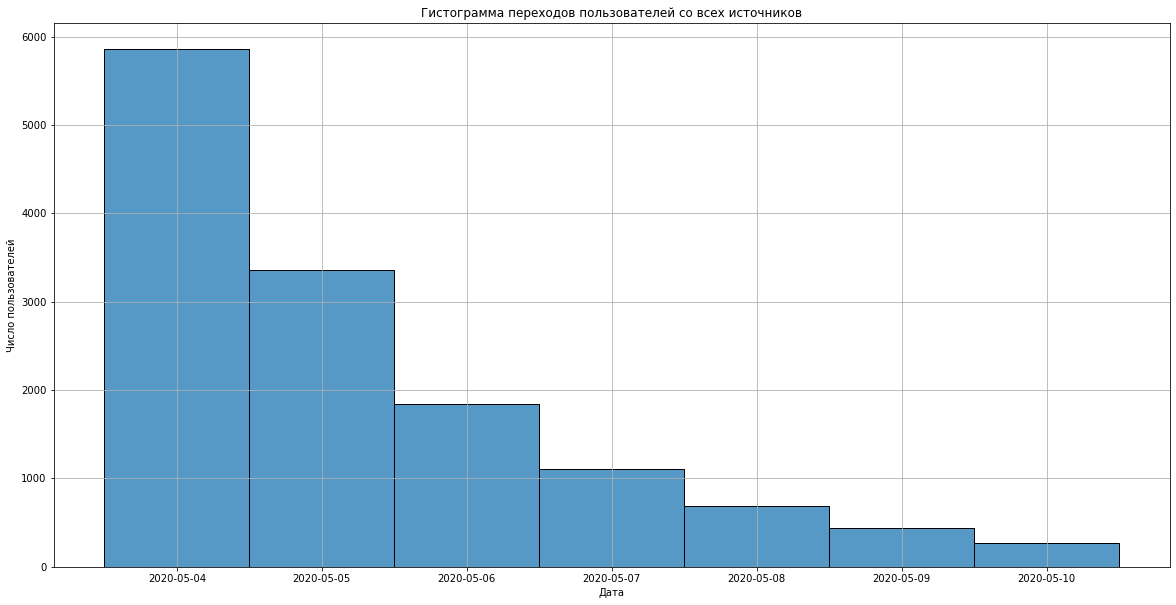

In [16]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=profiles['dt'])
plt.title('Гистограмма переходов пользователей со всех источников')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.grid()
plt.show()

Вначале рекламной кампании ( 4 мая 2020 года) у нас наблюдается самый сильный поток пользователей в наше приложение ( по крайне мере польователей, которые перешли по ссылке, установили приложение и совершили первое действие в нем).

Построим график первых переходов пользователей по источникам:

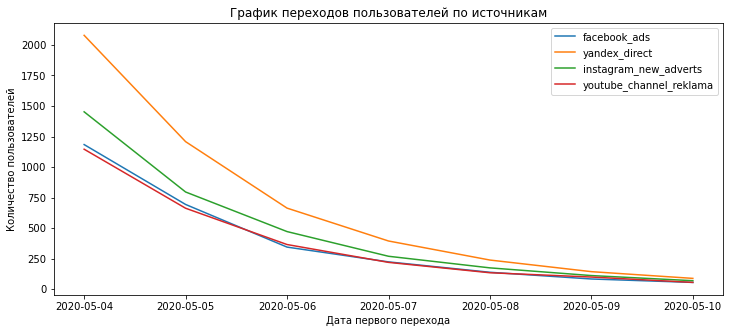

In [17]:
cumulative_facebook_ads = profiles[profiles['source']=='facebook_ads'][['dt','user_id']]
cumulative_facebook_ads = cumulative_facebook_ads.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_yandex_direct = profiles[profiles['source']=='yandex_direct'][['dt','user_id']]
cumulative_yandex_direct = cumulative_yandex_direct.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_instagram_new_adverts = profiles[profiles['source']=='instagram_new_adverts'][['dt','user_id']]
cumulative_instagram_new_adverts = cumulative_instagram_new_adverts.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_youtube_channel_reklama = profiles[profiles['source']=='youtube_channel_reklama'][['dt','user_id']]
cumulative_youtube_channel_reklama = cumulative_youtube_channel_reklama.groupby('dt').agg({'user_id': 'count'}).reset_index()
plt.figure(figsize=(12,5))
plt.xlabel('Дата первого перехода')
plt.ylabel('Количество пользователей')
plt.plot(cumulative_facebook_ads['dt'], cumulative_facebook_ads['user_id'], label='facebook_ads')
plt.plot(cumulative_yandex_direct['dt'], cumulative_yandex_direct['user_id'], label='yandex_direct')
plt.plot(cumulative_instagram_new_adverts['dt'], cumulative_instagram_new_adverts['user_id'], label='instagram_new_adverts')
plt.plot(cumulative_youtube_channel_reklama['dt'], cumulative_youtube_channel_reklama['user_id'], label='youtube_channel_reklama')
plt.title('График переходов пользователей по источникам')
plt.legend()
plt.show()

Лидирущий "поставщик" наших пользователей - это yandex_direct. В первые дни рекламной кампании он расположился на первом месте и до конца удерживал лидирующу позицию по привлечению новых пользователей в игру. Второе место уверенно занимает instagram_new_adverts. Третье и четвертое место: facebook_ads и youtube_channel_reklama привлекали нам примерно одинаковое количество пользователей. Все четыре источника перехода постепепнно в течении исследемого периода равномерно падали и привлекали с каждым днем все меньше и меньше пользователей в наше приложение.

Посмотрим на источники по общему количеству пользователей:

                    source  unique_users
2            yandex_direct          4817
1    instagram_new_adverts          3347
0             facebook_ads          2726
3  youtube_channel_reklama          2686


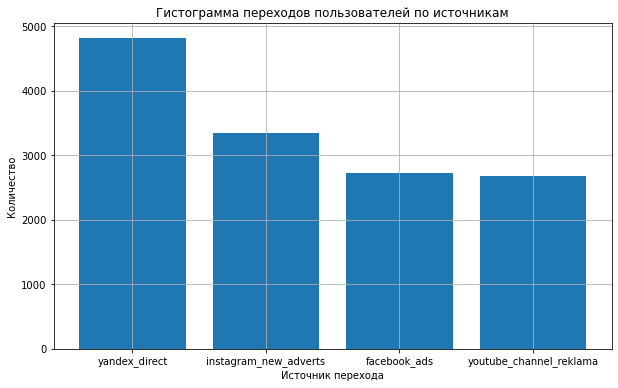

In [18]:
new_users = (
        profiles.groupby(['dt', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
new_users= new_users.groupby('source', as_index=False).agg({'unique_users':'sum'}).sort_values(by='unique_users', 
                                                                                               ascending = False)
print(new_users)
fig, ax = plt.subplots()
ax.bar(new_users['source'], new_users['unique_users'])
plt.xlabel('Источник перехода')
plt.ylabel('Количество')
plt.grid()
plt.title('Гистограмма переходов пользователей по источникам')
fig.set_figwidth(10)    
fig.set_figheight(6)  
plt.show()

По общему количеству переходов за весь период уверенно лидирует yandex_direct - 4817 пользователей.
На втором месте расположился instagram_new_adverts с 3347 переходами. Третье и четвертое место практически с равнывм количеством пользователей перешло к facebook_ads и youtube_channel_reklama 

<a id='2.1.3'></a>
#### Изучение пользователей по их действиям в приложении

Посмотрим как уникальные пользователей у нас распределены по дням:

In [19]:
data_actions_user=data_actions_new.copy(deep=True)
data_actions_user['event_datetime']=data_actions_user['event_datetime'].dt.date
data_actions_user=data_actions_user.groupby('event_datetime', as_index=False).agg({'user_id': 'nunique'})

Визуализируем наши данные:

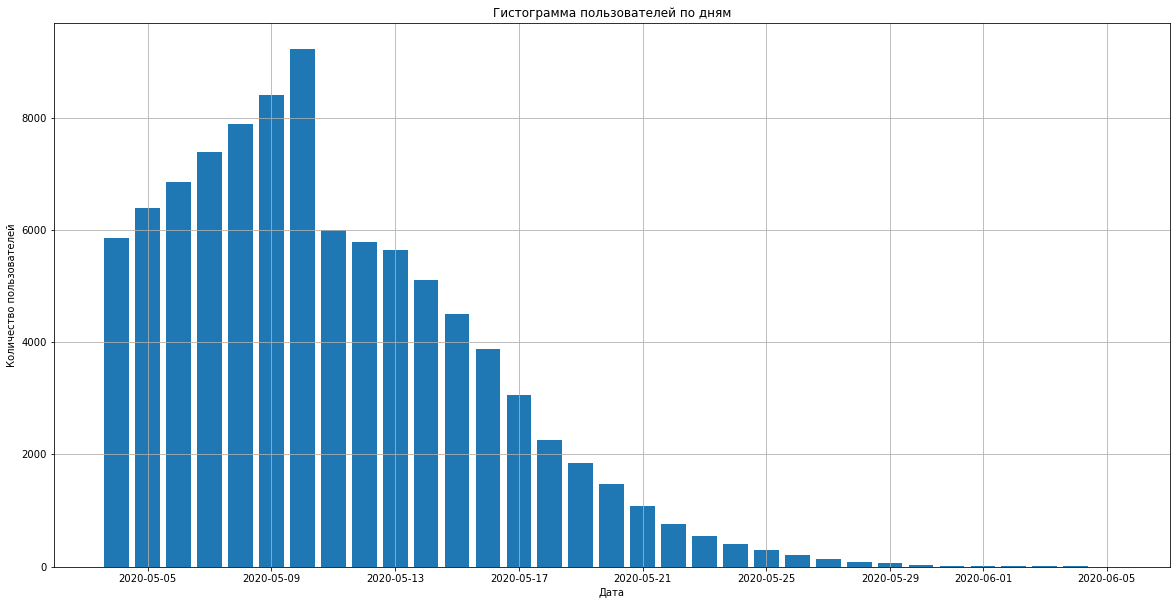

In [20]:
fig, ax = plt.subplots()
ax.bar(data_actions_user['event_datetime'], data_actions_user['user_id'])
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid()
plt.title('Гистограмма пользователей по дням')
fig.set_figwidth(20)    
fig.set_figheight(10)  
plt.show()
plt.show()

Мы наблюдаем что с 4 мая количество пользователей в игре прибавляется и максимум в чуть более 9000 достигается 10 мая, однако потом идет резкий спад. Предполагаю, что пользователи активно играли все майские прздники ( насколько я помню выходные были с 1 мая по 11 мая включительно в 2020 году). Так же, ключевой момент: 9 мая мы заплатили за последний день рекламной кампании (за 10 мая) и после этого уже новых игроков к нам по рекламным источникам не приходило, что так же обуславливает такой резкий спад.
11 мая уже предрабочий день, наверное многие пошли заниматься делами ( глажка, уборка, готовка еды на рабочую неделю), поэтому активность немного снизилась. После 11 мая наблюдается стабильная тенденция уменьшения пользователей каждый день и к началу июня уникальных пользователей в игре остается всего лишь 4, прискорбно.

Теперь предлагаю посмотреть на то, как пользователи проявляли активность в приложении по дням:

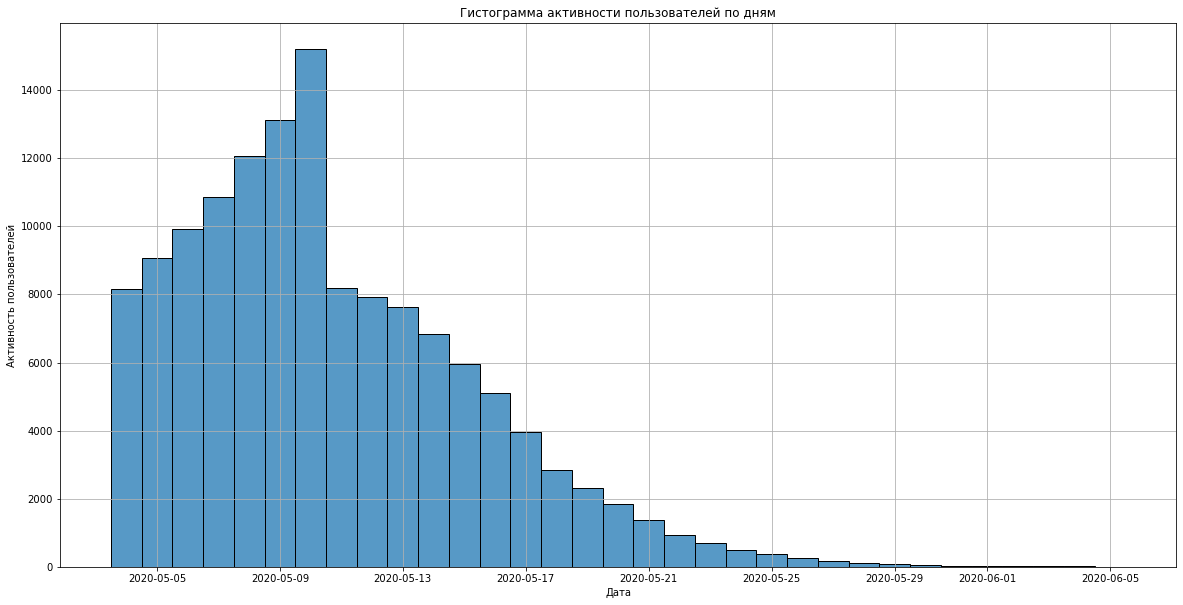

In [21]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=data_actions_new['event_datetime'].dt.date)
plt.title('Гистограмма активности пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Активность пользователей')
plt.grid()
plt.show()

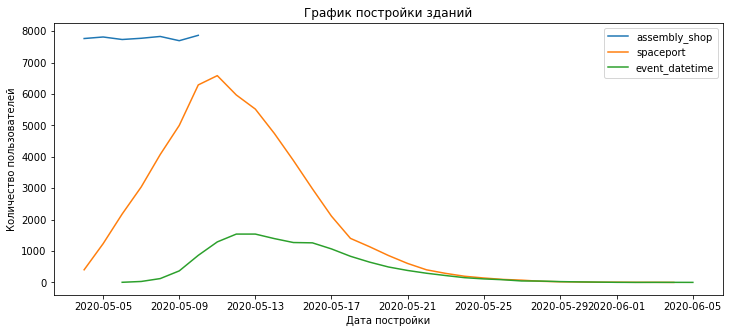

In [22]:
cumulative_assembly_shop = data_actions_new[data_actions_new['building_type']=='assembly_shop'][['dt','user_id']]
cumulative_assembly_shop = cumulative_assembly_shop.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_spaceport = data_actions_new[data_actions_new['building_type']=='spaceport'][['dt','user_id']]
cumulative_spaceport = cumulative_spaceport.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_research_center = data_actions_new[data_actions_new['building_type']=='research_center'][['dt','user_id']]
cumulative_research_center = cumulative_research_center.groupby('dt').agg({'user_id': 'count'}).reset_index()
plt.figure(figsize=(12,5))
plt.xlabel('Дата постройки')
plt.ylabel('Количество пользователей')
plt.plot(cumulative_assembly_shop['dt'], cumulative_assembly_shop['user_id'], label='assembly_shop')
plt.plot(cumulative_spaceport['dt'], cumulative_spaceport['user_id'], label='spaceport')
plt.plot(cumulative_research_center['dt'], cumulative_research_center['user_id'], label='event_datetime')
plt.title('График постройки зданий')
plt.legend()
plt.show()

Итак, мы получаем, что активность пользователей в приложении полностью совпадает с количеством уникальных пользователей по дням: стремительный рост активности с 4 мая, достигающий пика 10 мая ( чуть более 15 000 действий в день) и потом неуклонный спад до окончания исследуемого периода. 

По второму графику можно сказать, что такой резкий спад связан еще с тем ( помимо того что с 11 мая к нам перестали приходить новые пользователи), старые игроки полностью перестали почему то строить assembly_shop - здесь надо задать вопрос разрабочикам, почему так произошло ( возможно были технические проблемы с этим зданием и его строительство полностью отключили в игре). Так, возможно, есть какие то проблемы со строительством spaceport - его строительство так почему достаточно резко падает ( возможно это дорогое в постройке здание и вначале игрокам выдавали грубо говоря по 1000 приветсвенных "кристалов" и они его усиленно строили, а потом валюта кончилась и они уже не могли его строить как раньше ( опять таки надо уточнить как происходило строительство).

Посмотрим, что пользователи предпочитали строить:

In [23]:
building_type= data_actions_new.groupby('building_type', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', 
                                                                                               ascending = False)
building_type

,building_type,user_id
2,spaceport,59325
0,assembly_shop,54494
1,research_center,14137


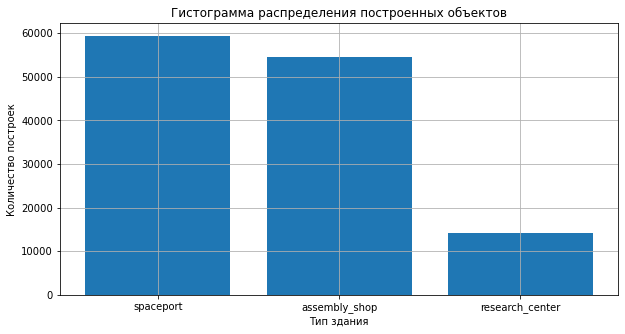

In [24]:
fig, ax = plt.subplots()
ax.bar(building_type['building_type'], building_type['user_id'])
plt.xlabel('Тип здания')
plt.ylabel('Количество построек')
plt.grid()
plt.title('Гистограмма распределения построенных объектов')
fig.set_figwidth(10)    
fig.set_figheight(5)  
plt.show()
plt.show()

Мы узнали, что самый популярный тип объекта при строительстве зданий - это космопорт ( с почти 60000 построек). Следом с небольшим отставанием идет сборочный цех - 54494 построек. У исследовательского центра очень большое оставание - 14137 построек.

Далее предлагаю посмотреть как пользователи распределились по типу завершения первого уровня: кто победил по средством постройки орбитальной станции, а кто по средством ПВП.

Мы уже знаем, что пользователей, которые завершили первый этап посредством постройки орбитальной станции 1866 человек, проверим это еще раз:

In [25]:
data_actions_new_pve=data_actions_new[data_actions_new['event'] == 'project']
print('\033[1m' + 'Всего пользователей заершили первый этап игры посредством постройки орбитаной станции:' + '\033[0m',\
                                      data_actions_new_pve['user_id'].nunique())

Всего пользователей заершили первый этап игры посредством постройки орбитаной станции: 1866


Теперь узнаем, сколько людей завершило первый уровень путем победы через ПВП:

In [26]:
data_actions_new_pvp=data_actions_new[data_actions_new['event'] != 'project']
data_actions_new_pvp=data_actions_new_pvp[data_actions_new_pvp['event'] == 'finished_stage_1']
data_actions_new_pvp=data_actions_new_pvp[~data_actions_new['user_id'].isin(data_actions_new_pve['user_id'])]
print('\033[1m' + 'Всего пользователей заершили первый этап игры посредством ПВП поебды :' + '\033[0m', \
                                          data_actions_new_pvp['user_id'].nunique())

Всего пользователей заершили первый этап игры посредством ПВП поебды : 3951


Отлично, данные сошлись: мы знаем что у нас пропусков по столбцу building_type 7683 - это как раз сумма пользователей, которые завершили первый этам ( либо постройкой орбитальной станции - это 1866 игроков и игроков, которые завершили первый этам через PVP-победу - это 3951 игрок; плючи сюдаже надо добавить еще 1866 пропусков, которые дал нам project по графе building_type).

Посчитаем сколько людей не завершили первый этам:

In [27]:
print('\033[1m' + 'Всего пользователей не завершили первый этап:' + '\033[0m', \
      (len(profiles)-len(data_actions_new_pvp)-len(data_actions_new_pve)))

Всего пользователей не завершили первый этап: 7759


In [28]:
data_actions_new_no=data_actions_new[data_actions_new['event'] != 'project']
data_actions_new_no=data_actions_new_no[~data_actions_new['user_id'].isin(data_actions_new_pvp['user_id'])]
data_actions_new_no=data_actions_new_no[~data_actions_new['user_id'].isin(data_actions_new_pve['user_id'])]

Далее предлагаю посмотреть, сколько зданий строят пользователи в зависимости от типа победы:

In [29]:
print(float(data_actions_new[data_actions_new['user_id'].isin(data_actions_new_pve['user_id'])].groupby('user_id')\
      .agg({'building_type':'count'}).mean()),\
      '\033[1m' + '- Столько зданий в среднем строит пользователь, победивший путем потройки Орбитальной станции' + '\033[0m')
print(float(data_actions_new[data_actions_new['user_id'].isin(data_actions_new_pvp['user_id'])].groupby('user_id')\
      .agg({'building_type':'count'}).mean()),\
      '\033[1m' + '- Столько зданий в среднем строит пользователь, победивший путем ПВП победы' + '\033[0m')
print(float(data_actions_new[data_actions_new['user_id'].isin(data_actions_new_no['user_id'].unique())].groupby('user_id')\
      .agg({'building_type':'count'}).mean()), \
      '\033[1m' + '- Столько зданий в среднем строит пользователь, который не прошел первый уровень' + '\033[0m')

12.64790996784566 - Столько зданий в среднем строит пользователь, победивший путем потройки Орбитальной станции
9.411541381928625 - Столько зданий в среднем строит пользователь, победивший путем ПВП победы
8.657043433432143 - Столько зданий в среднем строит пользователь, который не прошел первый уровень


Визуализируем полученные данные:

In [30]:
data_actions_new_pve_only=data_actions_new[data_actions_new['user_id'].isin(data_actions_new_pve['user_id'])]
data_actions_new_pve_only=data_actions_new_pve_only.groupby(['user_id', 'building_type']) \
                                                .agg({'building_type':'count'}) \
                                                .rename(columns={'user_id': 'Пользователи','building_type': 'Тип постройки'})\
                                                .reset_index()
data_actions_new_pve_only=data_actions_new_pve_only.rename(columns={'user_id': 'Пользователи',\
                                                                    'building_type': 'Тип постройки',\
                                                                    'Тип постройки':'Количество построек'})

In [31]:
data_actions_new_pvp_only=data_actions_new[data_actions_new['user_id'].isin(data_actions_new_pvp['user_id'])]
data_actions_new_pvp_only=data_actions_new_pvp_only.groupby(['user_id', 'building_type'])\
                                                   .agg({'building_type':'count'})\
                                                   .rename(columns={'user_id': 'Пользователб','building_type': 'Тип постройки'})\
                                                   .reset_index()
data_actions_new_pvp_only=data_actions_new_pvp_only.rename(columns={'user_id': 'Пользователи',\
                                                                    'building_type': 'Тип постройки',\
                                                                    'Тип постройки':'Количество построек'})

In [32]:
data_actions_new_no_win=data_actions_new[data_actions_new['user_id'].isin(data_actions_new_no['user_id'].unique())]
data_actions_new_no_win=data_actions_new_no_win.groupby(['user_id', 'building_type'])\
                                                   .agg({'building_type':'count'})\
                                                   .rename(columns={'user_id': 'Пользователб','building_type': 'Тип постройки'})\
                                                   .reset_index()
data_actions_new_no_win=data_actions_new_no_win.rename(columns={'user_id': 'Пользователи',\
                                                                    'building_type': 'Тип постройки',\
                                                                    'Тип постройки':'Количество построек'})

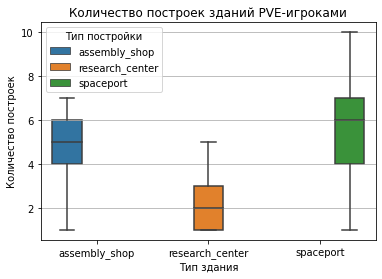

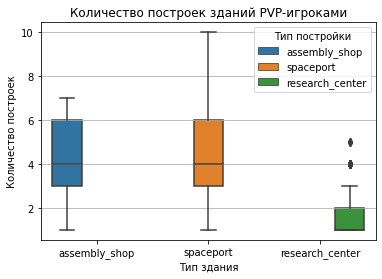

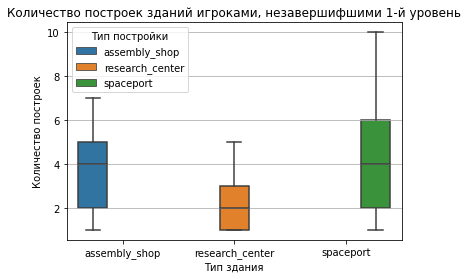

In [33]:
plt.grid()
boxplot=sns.boxplot(x='Тип постройки', y='Количество построек', data=data_actions_new_pve_only, hue = 'Тип постройки') 
boxplot.axes.set_title("Количество построек зданий PVE-игроками")
boxplot.set_xlabel("Тип здания")
boxplot.set_ylabel("Количество построек")
plt.show()
plt.grid()
boxplot=sns.boxplot(x='Тип постройки', y='Количество построек', data=data_actions_new_pvp_only, hue = 'Тип постройки') 
boxplot.axes.set_title("Количество построек зданий PVP-игроками")
boxplot.set_xlabel("Тип здания")
boxplot.set_ylabel("Количество построек")
plt.show()
plt.grid()
boxplot=sns.boxplot(x='Тип постройки', y='Количество построек', data=data_actions_new_no_win, hue = 'Тип постройки') 
boxplot.axes.set_title("Количество построек зданий игроками, незавершифшими 1-й уровень")
boxplot.set_xlabel("Тип здания")
boxplot.set_ylabel("Количество построек")
plt.show()

Итак, у нас получается, что пользователи, которые победили с помощью постройки Орбитальной станции - строят больше всего построек ( что в принципе неудивительно). Игроки, побеждающие с помощью PVP-побед так же строят достаточно много зданий. Что касается пользователей, которые не прошли 1-й уровень ожидаемо в среднем строят меньше всего зданий.

Предлагаю так же посмотреть, какие игроки ( по типу побед) какие здания предпочитают строить.

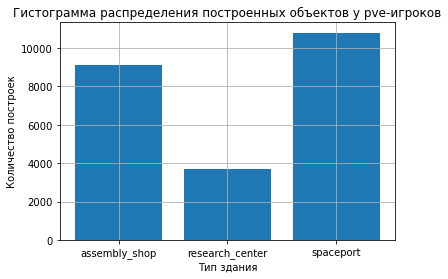

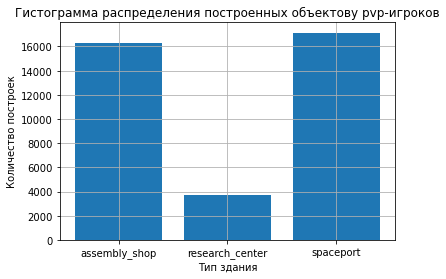

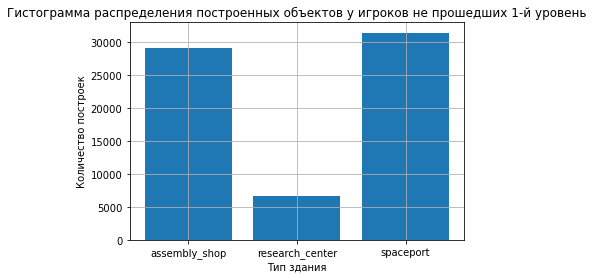

In [34]:
pve = data_actions_new_pve_only.groupby(['Тип постройки']).agg({'Количество построек':'sum'}).reset_index()
pvp = data_actions_new_pvp_only.groupby(['Тип постройки']).agg({'Количество построек':'sum'}).reset_index()                       
no_win = data_actions_new_no_win.groupby(['Тип постройки']).agg({'Количество построек':'sum'}).reset_index()     
fig, ax = plt.subplots()
ax.bar(pve['Тип постройки'], pve['Количество построек'])
plt.xlabel('Тип здания')
plt.ylabel('Количество построек')
plt.grid()
plt.title('Гистограмма распределения построенных объектов у pve-игроков')
plt.show()
fig, ax = plt.subplots()
ax.bar(pvp['Тип постройки'], pvp['Количество построек'])
plt.xlabel('Тип здания')
plt.ylabel('Количество построек')
plt.grid()
plt.title('Гистограмма распределения построенных объектову pvp-игроков')
plt.show()
fig, ax = plt.subplots()
ax.bar(no_win['Тип постройки'], no_win['Количество построек'])
plt.xlabel('Тип здания')
plt.ylabel('Количество построек')
plt.grid()
plt.title('Гистограмма распределения построенных объектов у игроков не прошедших 1-й уровень')
plt.show()

Стоит отметить, что самый популярный объект у всех игрков, независимо от типа победы - spaceport. Самый не популярный - research_center ( инетересно с чем это связано, посмотреть на них бы  в игре и понять какой функционал у каждого из них, может тогда станет яснее).

<a id='2.2'></a>
### Изучение поведения пользователей в зависмости от источника перехода

Предлагаю посмотреть как распрелялись типы постройки в зависимости от источника перехода

In [35]:
data_actions_new_group = data_actions_new.pivot_table(index='source', columns='building_type', \
                                                      values='user_id',aggfunc='count').reset_index()
data_actions_new_group['all_building']=data_actions_new_group['assembly_shop']+data_actions_new_group['research_center']\
                                      +data_actions_new_group['spaceport']
data_actions_new_group['Процент'] = data_actions_new_group['all_building'] / data_actions_new_group['all_building'].sum() * 100
data_actions_new_group['assembly_shop, Процент']=data_actions_new_group['assembly_shop']\
                                                 /data_actions_new_group['all_building']*100
data_actions_new_group['research_center, Процент']=data_actions_new_group['research_center']\
                                                  /data_actions_new_group['all_building']*100
data_actions_new_group['spaceport, Процент']=data_actions_new_group['spaceport']\
                                            /data_actions_new_group['all_building']*100
data_actions_new_group = data_actions_new_group.reindex(columns=['source','assembly_shop','assembly_shop, Процент',\
                                                                 'research_center','research_center, Процент',\
                                                                 'spaceport','spaceport, Процент','all_building','Процент'])
data_actions_new_group.sort_values(by='all_building', ascending = False)

building_type,source,assembly_shop,"assembly_shop, Процент",research_center,"research_center, Процент",spaceport,"spaceport, Процент",all_building,Процент
2,yandex_direct,19295,42.847309,4952,10.996625,20785,46.156067,45032,35.193348
1,instagram_new_adverts,13431,42.215936,3537,11.117397,14847,46.666667,31815,24.864016
0,facebook_ads,11117,42.543339,2945,11.270139,12069,46.186522,26131,20.421864
3,youtube_channel_reklama,10651,42.641525,2703,10.821523,11624,46.536953,24978,19.520773


Рекламный источник yandex_direct и здесь первый ( что и не удивительно), через этот канал к нам пришло больше всего пользователей и эти пользователи строят больше всего - практически 35 % построект приходится на пользователей, пришедших с yandex_direct. Второе место количества построек ( как и количество пришедших пользователей) у нас у пользователей, перешедших с instagram_new_adverts - почти 25% всех построект. На третьем и четвертом месте обосновались наши аутсайдеры: facebook_ads и youtube_channel_reklama с 20 % и 19 % соответветственно.

Игроки, перешедшие с разных источников, строят примерно в равной пропорции строят здания разных типов: assembly_shop - 42%, research_center - 11%, spaceport - 46 %.

То есть можем заключить, между пользователями с разных источников нет разницы в том что они строят в процентном соотношении.

Посмотрим как побеждают игроки, перешедшие с разных каналов:

In [36]:
data_actions_new_group_win = data_actions_new.pivot_table(index='source', columns='event', values='user_id',aggfunc='count')\
                             .reset_index().sort_values(by='finished_stage_1', ascending = False)
data_actions_new_group_win['Процент побед строительством']=data_actions_new_group_win['project']\
                                                          /data_actions_new_group_win['finished_stage_1']*100
data_actions_new_group_win['Процент побед посредством ПВП']=(100 - data_actions_new_group_win['project']\
                                                             /data_actions_new_group_win['finished_stage_1']*100)
data_actions_new_group_win

event,source,building,finished_stage_1,project,Процент побед строительством,Процент побед посредством ПВП
2,yandex_direct,45032,2042,620,30.362390,69.637610
1,instagram_new_adverts,31815,1466,476,32.469304,67.530696
3,youtube_channel_reklama,24978,1159,379,32.700604,67.299396
0,facebook_ads,26131,1150,391,34.000000,66.000000


Ранее мы выяснили, что игроки в основной своей массе побеждали в основном посредством ПВП-побед, в разрезе рекламных источников данная тенденция сохранилась. Притом видна закономерность: игроки, пришедшие по самому большому каналу, побеждают в ПВП больше чем игроки пришедшие с самых маленьких источников привлечения. И наоборот: победы за счет строительства Орбитаной станции в большей степени характерно игрокам, пришедших с менее популярных каналов привлечения.

Далее предлагаю посмотреть сколько в среднем строят игроки, пришедшие с разных источников:

In [37]:
print(round(float(data_actions_new[(data_actions_new['source'] == 'yandex_direct')].groupby('user_id')\
                  .agg({'building_type':'count'}).mean()),2),\
                  '\033[1m' + '- Столько зданий в среднем строит пользователь yandex_direct' + '\033[0m')
print(round(float(data_actions_new[(data_actions_new['source'] == 'instagram_new_adverts')].groupby('user_id')\
                  .agg({'building_type':'count'}).mean()),2), \
                  '\033[1m' + '- Столько зданий в среднем строит пользователь instagram_new_adverts' + '\033[0m')
print(round(float(data_actions_new[(data_actions_new['source'] == 'facebook_ads')].groupby('user_id').\
                  agg({'building_type':'count'}).mean()),2), \
                  '\033[1m' + '- Столько зданий в среднем строит пользователь facebook_ads' + '\033[0m')
print(round(float(data_actions_new[(data_actions_new['source'] == 'youtube_channel_reklama')].groupby('user_id')\
                  .agg({'building_type':'count'}).mean()),2), \
                  '\033[1m' + '- Столько зданий в среднем строит пользователь youtube_channel_reklama' + '\033[0m')

9.35 - Столько зданий в среднем строит пользователь yandex_direct
9.51 - Столько зданий в среднем строит пользователь instagram_new_adverts
9.59 - Столько зданий в среднем строит пользователь facebook_ads
9.3 - Столько зданий в среднем строит пользователь youtube_channel_reklama


В рамках нашей монетизации в данном случае стоит обратить внимание на следубщие источники привлечения игроков: facebook_ads и instagram_new_adverts - данные игроки предпочитают строить.

Далее предлагаю посмотреть на пользователей, привлеченных с разных источников перехода в разрезе стоимости затрат для их привлечения. Вначале сгрупируем пользователей по дням и проставим стоимость привлечения пользователей по дням.

Стоит обратить вниманеи, что стоимость привлечения пользователей начинается с 3 мая 2020 г, а данные по переходам пользователям начинаются с 4 мая, поэтому могу предположить, что стоимость, указанная на 3 мая - это цена привлечения на следующий день, поэтому надо будет отнять один день при формировании расчетно таблице:

In [38]:
profiles_users=profiles.groupby(['dt', 'source']).agg({'user_id': 'nunique'}).reset_index()
profiles_users['dt'] = pd.to_datetime(profiles_users['dt'])
profiles_users['dt'] = profiles_users['dt']-timedelta(days=1)
profiles_users = pd.merge(profiles_users, data_cost,  how='left', left_on=['dt','source'], right_on = ['day','source'])                          
profiles_users = profiles_users.groupby('source').agg({'cost':'sum', 'user_id':'sum'})\
                                                 .sort_values(by='cost', ascending = False)
profiles_users['Стоимость привлечения 1 игрока'] = profiles_users['cost']/profiles_users['user_id']
profiles_users

,cost,user_id,Стоимость привлечения 1 игрока
source,,,
yandex_direct,2233.111449,4817,0.463590
instagram_new_adverts,2161.441691,3347,0.645785
facebook_ads,2140.904643,2726,0.785365
youtube_channel_reklama,1068.119204,2686,0.397662


<a id='2.3'></a>
### Выводы

1. Мы выяснили, что пропусков наших данных нет:
   * По колонке "building_type" у нас в датасете 7683 пропусков - это как раз сумма событий "finished_stage_1" и "project" - это значит, что когда у игрока происходит событие Постройка орбитальной станции или Проект завершен  - по факту никакое строительство в колонке "building_type" не отображается. Можем заключить: пропусков в столбце "building_type" нет, отсутствующие значения - это либо постройкак Орбитальной станции либо Завершение проекта.
   * По столбцу "project_type" у нас есть 133 774 пропусков. Но и здесь мы уже получили ответ: это не пропуски, просто в этой колоки отображается факт Постройки орбитальной станции. Выше мы посчитали, что игроки построили 1866 орбитальных станци, а пропусков 133 774 - в сумме этим значения дают 135 640 - это как раз количество строк в нашем первом датасете.
2. По общему количеству переходов за весь период уверенно лидирует yandex_direct - 4817 пользователей.
На втором месте расположился instagram_new_adverts с 3347 переходами. Третье и четвертое место практически с равнывм количеством пользователей перешло к facebook_ads и youtube_channel_reklama 
3. Мы узнали, что самый популярный тип объекта при строительстве зданий - это космопорт ( с почти 60000 построек). Следом с небольшим отставанием идет сборочный цех - 54494 построек. У исследовательского центра очень большое оставание - 14137 построек.
4. Большинсво игроков проходят первый уровень путем победы - это  5817 игроков. Игроков, которые завершили первый уровень путем постройки Орбитальной станции, - 1866. 5893 - столько игроков не прошли первый уровень.
6. Узнали, как строят игроки, пришедшие с разных источников:
   * yandex_direct - 45032 построек или 35.19 % от общего количества построеных зданий.
   * instagram_new_adverts - 31815 построек или 24.86 % от общего количества построеных зданий.
   * facebook_ads - 26131 построек или 20.42 % от общего количества построеных зданий.
   * youtube_channel_reklama - 24978 построек или 19.52 % от общего количества построеных зданий.
7. Расчитали стоимость привлечения пользователей по рекламным источникам:
   * yandex_direct - 0.46
   * instagram_new_adverts - 0.65
   * facebook_ads - 0.78
   * youtube_channel_reklama - 0.40
   
По итогам проведенного исследования можно однозначно сказать, что лидером по источнику перехода является **yandex_direct**. Через этот канал к нам приходят самое большое количество пользователей, которые строят соответственно больше всех зданий ( практически 35 % построек приходится на пользователей этого канала). К тому же стоимость привлечения пользователей по данному каналу одна из самых дешевых ( 0,46 у.е. за 1 игрока). Вторым по значимости я бы наверное выделил канал привлечения **youtube_channel_reklama**. По данному каналу к нам приходит конечно наименьшее число пользователей из всех, однако стоит учетсь такие моменты: во-первых это самый дешевый источник привлечения новых игроков (0,39 у.е.), во-вторых данный пользователи как и все любят строить ( строят в среднем 9 зданий, в то время как остальные от 9,35 до 9,59 - разница не столь существена). Думаю что разработчикам стоит уделить больше внимание этому каналу привлечения.

<a id='3'></a>
## Проверка гипотез

<a id='3.1'></a>
### Проверка гипотезы: время завершения уровня различается в зависимости способа прохождения

Чтобы проверить данную гипотезу, сформируем две выборки: с pve и pvp игроками.

In [39]:
users_pvp= data_actions_new_pvp.copy(deep=True)

Добавим столбец с первым заходом в игру:

In [40]:
users_pvp = users_pvp.merge(profiles[['user_id','first_ts']], on='user_id')

Найдем время по истечению, которого игроки победили:

In [41]:
users_pvp['time_win'] = users_pvp['event_datetime'] - users_pvp['first_ts']
users_pvp['time_win']=users_pvp['time_win'].dt.total_seconds()
users_pvp

,event_datetime,event,building_type,user_id,project_type,source,dt,first_ts,time_win
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04,2020-05-04 00:13:21,70448.0
1,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,2020-05-05,2020-05-04 00:22:48,133161.0
2,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,youtube_channel_reklama,2020-05-05,2020-05-04 13:41:55,105162.0
3,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama,2020-05-05,2020-05-04 00:57:02,160227.0
4,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,facebook_ads,2020-05-06,2020-05-04 19:23:40,124722.0
...,...,...,...,...,...,...,...,...,...
3946,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN,yandex_direct,2020-06-04,2020-05-04 08:45:09,2671133.0
3947,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,yandex_direct,2020-06-04,2020-05-04 18:38:25,2668333.0
3948,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,yandex_direct,2020-06-05,2020-05-07 07:28:50,2487382.0
3949,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,facebook_ads,2020-06-05,2020-05-07 05:43:45,2528922.0


Проведем аналогичные манипуляции для pve-игроков:

In [42]:
users_pve_one = data_actions_new[data_actions_new['event'] == 'project']
users_pve_two = data_actions_new[data_actions_new['event'] == 'finished_stage_1']
users_pve = users_pve_two[users_pve_two['user_id'].isin(users_pve_one['user_id'])]
users_pve = users_pve.merge(profiles[['user_id','first_ts']], on='user_id')
users_pve['time_win'] = users_pve['event_datetime'] - users_pve['first_ts']
users_pve['time_win']=users_pve['time_win'].dt.total_seconds()
users_pve

,event_datetime,event,building_type,user_id,project_type,source,dt,first_ts,time_win
0,2020-05-10 02:37:50,finished_stage_1,NaN,9e57e5bb-49f4-4efb-991c-747d7a88e446,NaN,yandex_direct,2020-05-10,2020-05-04 12:13:36,483854.0
1,2020-05-10 10:30:22,finished_stage_1,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,NaN,youtube_channel_reklama,2020-05-10,2020-05-04 06:50:30,531592.0
2,2020-05-10 14:40:04,finished_stage_1,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,NaN,yandex_direct,2020-05-10,2020-05-04 01:42:30,565054.0
3,2020-05-11 02:10:33,finished_stage_1,NaN,9f63fad6-17b0-493f-938b-8d19e6d6c38c,NaN,instagram_new_adverts,2020-05-11,2020-05-04 06:39:33,588660.0
4,2020-05-11 08:37:32,finished_stage_1,NaN,ee21905b-ab5a-44c6-9196-e5c9f8fada19,NaN,yandex_direct,2020-05-11,2020-05-04 01:40:19,629833.0
...,...,...,...,...,...,...,...,...,...
1861,2020-06-02 20:53:20,finished_stage_1,NaN,9df154c3-fb77-4f8a-a281-0457c0b11cec,NaN,instagram_new_adverts,2020-06-02,2020-05-05 03:15:52,2482648.0
1862,2020-06-02 23:31:08,finished_stage_1,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,yandex_direct,2020-06-02,2020-05-07 18:38:47,2263941.0
1863,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,youtube_channel_reklama,2020-06-03,2020-05-09 01:14:45,2208397.0
1864,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,facebook_ads,2020-06-04,2020-05-08 09:14:00,2328567.0


Итак, мы создали два датасета, в которых содержится информация о двух типах игроках ( тех которые побеждали путем постройки Орбитальной станции и тех которые побеждали путем победы над врагом). Можно приступать к проверке гипотезы.

Построим график побед пользователе по дня, а так же посмотрим на гистограмму и график плотности распределения побед пользоватлеей по времени.

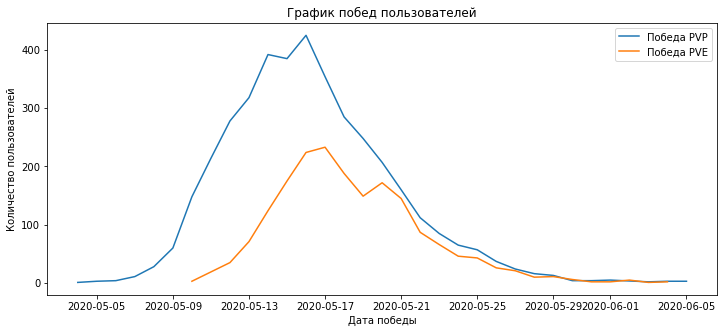

In [43]:
users_pvp['win'] = 1
users_pvp['type'] = 'Победа PVP'
users_pve['win'] = 0
users_pve['type'] = 'Победа PVE'
users_all = users_pve.append(users_pvp, sort=False)
cumulative_pvp = users_all[users_all['type']=='Победа PVP'][['dt','user_id']]
cumulative_pvp = cumulative_pvp.groupby('dt').agg({'user_id': 'count'}).reset_index()
cumulative_pve = users_all[users_all['type']=='Победа PVE'][['dt','user_id']]
cumulative_pve = cumulative_pve.groupby('dt').agg({'user_id': 'count'}).reset_index()
plt.figure(figsize=(12,5))
plt.xlabel('Дата победы')
plt.ylabel('Количество пользователей')
plt.plot(cumulative_pvp['dt'], cumulative_pvp['user_id'], label='Победа PVP')
plt.plot(cumulative_pve['dt'], cumulative_pve['user_id'], label='Победа PVE')
plt.title('График побед пользователей')
plt.legend()
plt.show()

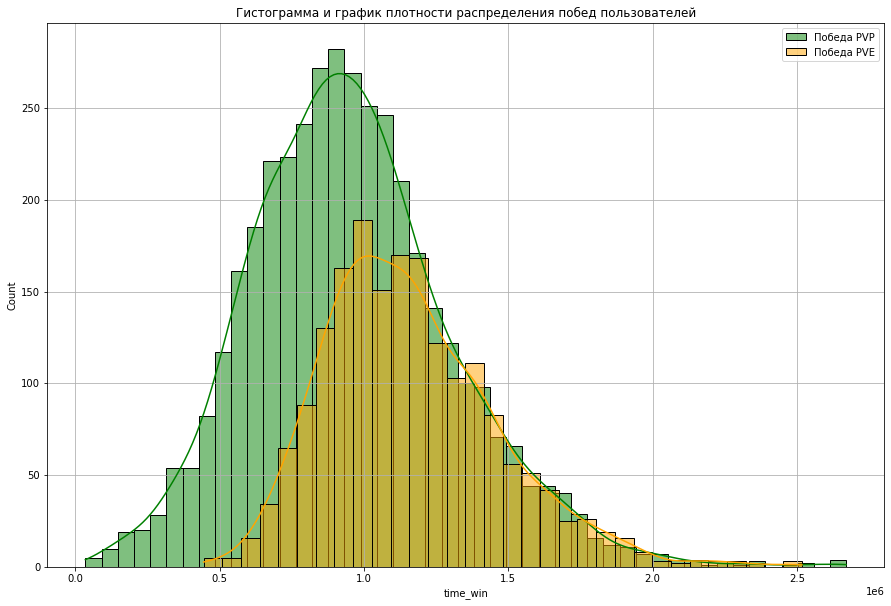

In [44]:
plt.figure(figsize=(15,10))
sns.histplot(data=users_all, x=users_all.query('type=="Победа PVP"')['time_win'], color="green", label="Победа PVP", kde=True)
sns.histplot(data=users_all, x=users_all.query('type=="Победа PVE"')['time_win'], color="orange", label="Победа PVE", kde=True)
plt.grid()
plt.title('Гистограмма и график плотности распределения побед пользователей')
plt.legend() 
plt.show()

Визуально в приницпе все хорошо, но стоит заметить что распределение побед пользователей в PVE незначительно отличается от побед пользователей PVP. Проверим эту гипотезу расчетами.

**Обозначим:**
* Нулевая гипотеза(H0): время завершения первого уровня не отличается от типа победы
* Альтернативная гипотеза (Н1): время завершения первого уровня отличается от типа победы
* Объявим p-value = 0,05

In [45]:
alpha = .05 
results = st.ttest_ind(users_pve['time_win'], users_pvp['time_win'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  7.256845329495443e-98
Отвергаем нулевую гипотезу


Судя по нашим расчетам присутсвуют статистически значимые различия во времени прохождения первого уровня в зависимости от типа победы ( постройка орбитальной станции и победа на врагом).

<a id='3.2'></a>
### Проверка гипотезы: тип победы не отличается между пользвателями, пришедшими с двух разных источников

В данном разделе предлагаю посмотреть отличается ли тип победы ( пве или пвп) между игроками, приедшими с двух разных каналов: yandex_direct и youtube_channel_reklama.

Сформируем два новых датасета по каналам:

In [46]:
users_ya = users_pve.append(users_pvp, sort=False)
users_ya = users_ya[users_ya['source'] == 'yandex_direct']
users_ya

,event_datetime,event,building_type,user_id,project_type,source,dt,first_ts,time_win,win,type
0,2020-05-10 02:37:50,finished_stage_1,NaN,9e57e5bb-49f4-4efb-991c-747d7a88e446,NaN,yandex_direct,2020-05-10,2020-05-04 12:13:36,483854.0,0,Победа PVE
2,2020-05-10 14:40:04,finished_stage_1,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,NaN,yandex_direct,2020-05-10,2020-05-04 01:42:30,565054.0,0,Победа PVE
4,2020-05-11 08:37:32,finished_stage_1,NaN,ee21905b-ab5a-44c6-9196-e5c9f8fada19,NaN,yandex_direct,2020-05-11,2020-05-04 01:40:19,629833.0,0,Победа PVE
5,2020-05-11 08:50:17,finished_stage_1,NaN,08425f93-aaca-40a7-97d0-7ff4be09b990,NaN,yandex_direct,2020-05-11,2020-05-05 13:21:12,502145.0,0,Победа PVE
7,2020-05-11 09:57:05,finished_stage_1,NaN,7551f807-74e8-4bf7-8df1-3dd8bee479af,NaN,yandex_direct,2020-05-11,2020-05-04 03:30:44,627981.0,0,Победа PVE
...,...,...,...,...,...,...,...,...,...,...,...
3938,2020-06-01 02:50:24,finished_stage_1,NaN,eb1c0ded-45da-461a-9cf2-3288d58d3af2,NaN,yandex_direct,2020-06-01,2020-05-04 17:24:22,2366762.0,1,Победа PVP
3942,2020-06-01 21:05:32,finished_stage_1,NaN,c147c105-eb88-4f2d-887f-05779b0f2c19,NaN,yandex_direct,2020-06-01,2020-05-05 16:18:08,2350044.0,1,Победа PVP
3946,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN,yandex_direct,2020-06-04,2020-05-04 08:45:09,2671133.0,1,Победа PVP
3947,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,yandex_direct,2020-06-04,2020-05-04 18:38:25,2668333.0,1,Победа PVP


In [47]:
users_ya_new = users_ya.pivot_table(index='type',values='win',aggfunc='count').reset_index()
users_ya_new['pecent'] = round (users_ya_new['win']/users_ya_new['win'].sum()*100, 2)
users_ya_new

,type,win,pecent
0,Победа PVE,620,30.36
1,Победа PVP,1422,69.64


In [48]:
users_yt = users_pve.append(users_pvp, sort=False)
users_yt = users_yt[users_yt['source'] == 'youtube_channel_reklama']

In [49]:
users_yt_new = users_yt.pivot_table(index='type',values='win',aggfunc='count').reset_index()
users_yt_new['pecent'] = round (users_yt_new['win']/users_yt_new['win'].sum()*100, 2)
users_yt_new

,type,win,pecent
0,Победа PVE,379,32.7
1,Победа PVP,780,67.3


Итак, визуально мы видим, что существенных различий в типах побед между игроками, пришедших с разных каналов нет - разница составляет примерно 2 %. Проверим это расчетом.

**Обозначим:**
* Нулевая гипотеза(H0): тип победы у пользователей из yandex_direct и из youtube_channel_reklama одинаковый
* Альтернативная гипотеза (Н1): тип победы у пользователей из yandex_direct и из youtube_channel_reklama разный
* Объявим p-value = 0,05

In [50]:
alpha = .05 
results = st.ttest_ind(users_ya['win'], users_yt['win'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.17011711801262347
Не получилось отвергнуть нулевую гипотезу


Нам не получилось отвергнуть нулевую гипотезу, поэтому можем предположить, что игроки, пришедшие из yandex_direct, имеют такое же процентное соотношение по типам побед ( pve и pvp) как и игроки, пришедшие по каналу youtube_channel_reklama.

<a id='4'></a>
## Общий вывод

1. По общему количеству переходов за весь период уверенно лидирует yandex_direct - 4817 пользователей.
На втором месте расположился instagram_new_adverts с 3347 переходами. Третье и четвертое место практически с равнывм количеством пользователей перешло к facebook_ads и youtube_channel_reklama 
2. Мы узнали, что самый популярный тип объекта при строительстве зданий - это космопорт ( с почти 60000 построек). Следом с небольшим отставанием идет сборочный цех - 54494 построек. У исследовательского центра очень большое оставание - 14137 построек.
3. Большинсво игроков проходят первый уровень путем победы - это  5817 игроков. Игроков, которые завершили первый уровень путем постройки Орбитальной станции, - 1866. 5893 - столько игроков не прошли первый уровень.
4. Узнали, как строят игроки, пришедшие с разных источников:
   * yandex_direct - 45032 построек или 35.19 % от общего количества построеных зданий.
   * instagram_new_adverts - 31815 построек или 24.86 % от общего количества построеных зданий.
   * facebook_ads - 26131 построек или 20.42 % от общего количества построеных зданий.
   * youtube_channel_reklama - 24978 построек или 19.52 % от общего количества построеных зданий.
5. Расчитали стоимость привлечения пользователей по рекламным источникам:
   * yandex_direct - 0.46
   * instagram_new_adverts - 0.65
   * facebook_ads - 0.78
   * youtube_channel_reklama - 0.40
6. Через **yandex_direct** к нам приходят самое большое количество пользователей, которые строят соответственно больше всех зданий ( практически 35 % построек приходится на пользователей этого канала). К тому же стоимость привлечения пользователей по данному каналу одна из самых дешевых ( 0,46 у.е. за 1 игрока). Вторым по значимости я бы наверное выделил канал привлечения **youtube_channel_reklama**. По данному каналу к нам приходит конечно наименьшее число пользователей из всех, однако стоит учетсь такие моменты: во-первых это самый дешевый источник привлечения новых игроков (0,39 у.е.), во-вторых данный пользователи как и все любят строить ( строят в среднем 9 зданий, в то время как остальные от 9,35 до 9,59 - разница не столь существена). Думаю что разработчикам стоит уделить больше внимание этому каналу привлечения.
7. Статистически значимая разница во времени прохождения 1го уровня между игроками, которые проходят первый уровень через постройку орбитальной станции и игроками, которые побеждают путем ПВП-побед присутствует.
8. Игроки пришедшие к нам через **yandex_direct**, так же как и пришедшие через **youtube_channel_reklama**, делятся примерно на равные пропорции по типу побед ( PVP и PVE).
9. В сухом остатке можно сказать, что наилучшим источником привлечения новых игроков является **yandex_direct**, но стоит обратить внимание и на **youtube_channel_reklama**, где стоимость привлечения клиентов стоит дешевле, чем на других платформах, а ведут себя они так же ( постройки, тип победы).
10. Так же я бы еще предложил разработчикам рассмотреть еще один вариант монетизации: показывать рекламу пользователям во время боев. Но тут надо наверное вначале провести А/В тесты и понять раздражает это пользователей сильно или нет, а то может случится так, что из-за сильно избыточной рекламы пользователи уйдут из игры.

<a id='5'></a>
## Дашборд по проекту

https://public.tableau.com/app/profile/denis7928/viz/_16532295126480/Dashboard1?publish=yes

<a id='6'></a>
## Презентация по исследованию

https://disk.yandex.ru/i/GAUJvFvjJSjsCA